#### Experiment Results

In [377]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

### Static Workload

In [378]:
# plot the total times for all three methods: mab, whit, wfit with whatif

def plot_total_workload_time(mab_total_time, wfit_total_time, wfit_total_time_whatif, noindex_execution_time, num_rounds=20, set_ylim=False):

    # Set global font properties
    plt.rcParams.update({'font.family': 'DejaVu Sans'})
    plt.rcParams['font.size'] = 14
    plt.rcParams['axes.titlesize'] = 13
    plt.rcParams['axes.labelsize'] = 13
    plt.rcParams['xtick.labelsize'] = 11
    plt.rcParams['ytick.labelsize'] = 11
    plt.rcParams['legend.fontsize'] = 11

    plt.figure(figsize=(5.5, 4.25))  # Width: 10 inches, Height: 6 inches


    plt.plot(range(1,len(mab_total_time)+1), mab_total_time, label='MAB', linestyle='--', color='darkorange')  # Orange dashed line for MAB
    plt.plot(range(1,len(mab_total_time)+1), wfit_total_time, label='WFIT + Ext.', linestyle='-', color='#2F4F6F')  # Dark greyish blue solid line for WFIT
    plt.plot(range(1,len(mab_total_time)+1), wfit_total_time_whatif, label='WFIT + What-If', linestyle='-.', color='darkgrey')  # Light grey dotted line for WFIT with What-If
    plt.plot(range(1,len(mab_total_time)+1), noindex_execution_time, label='No Index', linestyle=':', color='red')  # Slightly darker blue dotted line for No Index

    # Set custom tick labels for the horizontal axis
    plt.xticks(ticks=range(0, num_rounds+1, 5), labels=range(0, num_rounds+1, 5))

    #plt.legend()
    plt.legend(loc='upper right', borderpad=0.3) #, bbox_to_anchor=(1.1, 1.05))

    # set custom y limit
    if set_ylim: plt.ylim(0, 250)

    plt.xlabel('Round #')
    plt.ylabel('Total Time Per Round (s)')
    #plt.title('Total time for MAB, WFIT and WFIT with What-If')
    plt.show()



MAB --> total workload time: 1749.4877010649986, total execution time: 1264.7467220000003, total transition time: 484.7409790649981, average recommendation time: 0.06824775410027542
WFIT --> total workload time: 1448.8143419862824, total execution time: 1269.2583829999999, total transition time: 179.55595898628235, average recommendation time: 14.541719007492066
WFIT --> total workload time (whatif): 1654.3898108434603, total execution time (whatif): 1518.2354670000002, total transition time (whatif): 136.15434384346008, average recommendation time (whatif): 78.24510139226913
NOINDEX --> total workload time: 3113.6005990000003


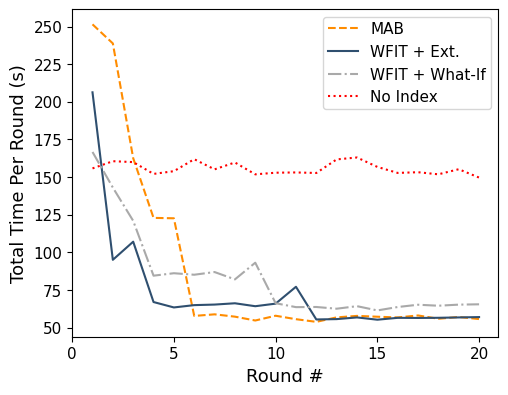

In [379]:
experiment = 'ssb_static'

# read results from pickle file dictionary
with open(f'mab_results_{experiment}.pkl', 'rb') as f:
    mab_results = pickle.load(f)

mab_recommendation_time = mab_results['batch_recommmendation_time']
mab_materialization_time = mab_results['batch_materialization_time'] 
mab_execution_time = mab_results['batch_execution_time'] 
# convert to seconds
mab_recommendation_time = [time/1000 for time in mab_recommendation_time]
mab_materialization_time = [time/1000 for time in mab_materialization_time]
mab_execution_time = [time/1000 for time in mab_execution_time]
mab_total_time = [exec_time+mat_time for exec_time, mat_time in zip(mab_execution_time, mab_materialization_time)]

mab_total_execution_time = sum(mab_execution_time)
mab_total_transition_time = sum(mab_materialization_time)
mab_total_workload_time = sum(mab_total_time)
mab_total_recommendation_time = sum(mab_recommendation_time)
mab_average_recommendation_time = np.mean(mab_recommendation_time)

with open(f'wfit_results_{experiment}.pkl', 'rb') as f:
    wfit_results = pickle.load(f)

wfit_recommendation_time = wfit_results['batch_recommmendation_time']
wfit_materialization_time = wfit_results['batch_materialization_time']
wfit_execution_time = wfit_results['batch_execution_time']
wfit_total_time = [exec_time+mat_time for exec_time, mat_time in zip(wfit_execution_time, wfit_materialization_time)]
wfit_total_recommendation_time = sum(wfit_recommendation_time)

wfit_total_execution_time = sum(wfit_execution_time)    
wfit_total_transition_time = sum(wfit_materialization_time)
wfit_total_workload_time = sum(wfit_total_time)
wfit_average_recommendation_time = np.mean(wfit_recommendation_time)

with open(f'wfit_results_whatif_{experiment}.pkl', 'rb') as f:
    wfit_results_whatif = pickle.load(f)

wfit_recommendation_time_whatif = wfit_results_whatif['batch_recommmendation_time']
wfit_materialization_time_whatif = wfit_results_whatif['batch_materialization_time']
wfit_execution_time_whatif = wfit_results_whatif['batch_execution_time']
wfit_total_time_whatif = [exec_time+mat_time for exec_time, mat_time in zip(wfit_execution_time_whatif, wfit_materialization_time_whatif)]

wfit_execution_time_whatif = sum(wfit_execution_time_whatif)
wfit_materialization_time_whatif = sum(wfit_materialization_time_whatif)
wfit_total_workload_time_whatif = sum(wfit_total_time_whatif)
wfit_total_recommendation_time_whatif = sum(wfit_recommendation_time_whatif)
wfit_average_recommendation_time_whatif = np.mean(wfit_recommendation_time_whatif)

with open(f'noindex_results_{experiment}.pkl', 'rb') as f:
    workload = pickle.load(f)

noindex_execution_time = workload['batch_execution_time']
noindex_execution_time = [sum(time) for time in noindex_execution_time]
noindex_total_workload_time = sum(noindex_execution_time)

print(f'MAB --> total workload time: {mab_total_workload_time}, total execution time: {mab_total_execution_time}, total transition time: {mab_total_transition_time}, average recommendation time: {mab_average_recommendation_time}')
print(f'WFIT --> total workload time: {wfit_total_workload_time}, total execution time: {wfit_total_execution_time}, total transition time: {wfit_total_transition_time}, average recommendation time: {wfit_average_recommendation_time}')
print(f'WFIT --> total workload time (whatif): {wfit_total_workload_time_whatif}, total execution time (whatif): {wfit_execution_time_whatif}, total transition time (whatif): {wfit_materialization_time_whatif}, average recommendation time (whatif): {wfit_average_recommendation_time_whatif}')
print(f'NOINDEX --> total workload time: {noindex_total_workload_time}')

plot_total_workload_time(mab_total_time, wfit_total_time, wfit_total_time_whatif, noindex_execution_time)

MAB --> total workload time: 898.1237223859911, total execution time: 197.284094, total transition time: 700.8396283859911, average recommendation time: 0.08047572060058883
WFIT --> total workload time: 531.754493064377, total execution time: 238.43769700000001, total transition time: 293.31679606437683, average recommendation time: 20.66058031320572
WFIT --> total workload time (whatif): 503.85779918916313, total execution time (whatif): 174.122126, total transition time (whatif): 329.7356731891632, average recommendation time (whatif): 65.5557338833809
NOINDEX --> total workload time: 1438.930776


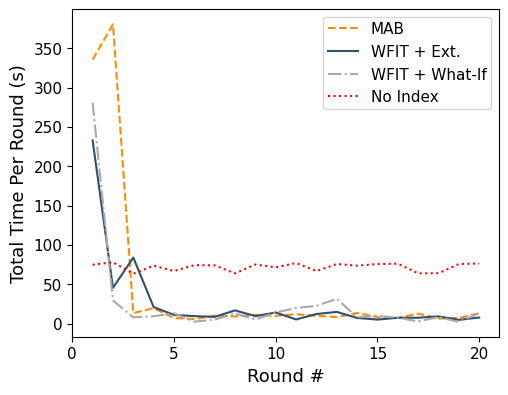

In [380]:
experiment = 'tpch_static'

# read results from pickle file dictionary
with open(f'mab_results_{experiment}.pkl', 'rb') as f:
    mab_results = pickle.load(f)

mab_recommendation_time = mab_results['batch_recommmendation_time']
mab_materialization_time = mab_results['batch_materialization_time'] 
mab_execution_time = mab_results['batch_execution_time'] 
# convert to seconds
mab_recommendation_time = [time/1000 for time in mab_recommendation_time]
mab_materialization_time = [time/1000 for time in mab_materialization_time]
mab_execution_time = [time/1000 for time in mab_execution_time]
mab_total_time = [exec_time+mat_time for exec_time, mat_time in zip(mab_execution_time, mab_materialization_time)]

mab_total_execution_time = sum(mab_execution_time)
mab_total_transition_time = sum(mab_materialization_time)
mab_total_workload_time = sum(mab_total_time)
mab_total_recommendation_time = sum(mab_recommendation_time)
mab_average_recommendation_time = np.mean(mab_recommendation_time)

with open(f'wfit_results_{experiment}.pkl', 'rb') as f:
    wfit_results = pickle.load(f)

wfit_recommendation_time = wfit_results['batch_recommmendation_time']
wfit_materialization_time = wfit_results['batch_materialization_time']
wfit_execution_time = wfit_results['batch_execution_time']
wfit_total_time = [exec_time+mat_time for exec_time, mat_time in zip(wfit_execution_time, wfit_materialization_time)]
wfit_total_recommendation_time = sum(wfit_recommendation_time)

wfit_total_execution_time = sum(wfit_execution_time)    
wfit_total_transition_time = sum(wfit_materialization_time)
wfit_total_workload_time = sum(wfit_total_time)
wfit_average_recommendation_time = np.mean(wfit_recommendation_time)

with open(f'wfit_results_whatif_{experiment}.pkl', 'rb') as f:
    wfit_results_whatif = pickle.load(f)

wfit_recommendation_time_whatif = wfit_results_whatif['batch_recommmendation_time']
wfit_materialization_time_whatif = wfit_results_whatif['batch_materialization_time']
wfit_execution_time_whatif = wfit_results_whatif['batch_execution_time']
wfit_total_time_whatif = [exec_time+mat_time for exec_time, mat_time in zip(wfit_execution_time_whatif, wfit_materialization_time_whatif)]

wfit_execution_time_whatif = sum(wfit_execution_time_whatif)
wfit_materialization_time_whatif = sum(wfit_materialization_time_whatif)
wfit_total_workload_time_whatif = sum(wfit_total_time_whatif)
wfit_total_recommendation_time_whatif = sum(wfit_recommendation_time_whatif)
wfit_average_recommendation_time_whatif = np.mean(wfit_recommendation_time_whatif)

with open(f'noindex_results_{experiment}.pkl', 'rb') as f:
    workload = pickle.load(f)

noindex_execution_time = workload['batch_execution_time']
noindex_total_workload_time = sum(noindex_execution_time)

print(f'MAB --> total workload time: {mab_total_workload_time}, total execution time: {mab_total_execution_time}, total transition time: {mab_total_transition_time}, average recommendation time: {mab_average_recommendation_time}')
print(f'WFIT --> total workload time: {wfit_total_workload_time}, total execution time: {wfit_total_execution_time}, total transition time: {wfit_total_transition_time}, average recommendation time: {wfit_average_recommendation_time}')
print(f'WFIT --> total workload time (whatif): {wfit_total_workload_time_whatif}, total execution time (whatif): {wfit_execution_time_whatif}, total transition time (whatif): {wfit_materialization_time_whatif}, average recommendation time (whatif): {wfit_average_recommendation_time_whatif}')
print(f'NOINDEX --> total workload time: {noindex_total_workload_time}')

plot_total_workload_time(mab_total_time, wfit_total_time, wfit_total_time_whatif, noindex_execution_time)

In [381]:
78/1.2

65.0

In [382]:
65./2

32.5

In [383]:
def plot_bar_chart(dataset1_times, dataset2_times, ylabel):
    algorithms = ['WFIT + whatif', 'WFIT + ext.', 'MAB', 'No Index']

    # Define neutral colors with a grayish tinge for each algorithm
    colors = ['#A9A9A9', '#778899', '#B0C4DE', '#D3D3D3']  # Dark Gray, Light Steel Blue, Slate Gray, Light Gray

    # Define more intricate patterns for textures
    patterns = ['////', 'xxxx', '++++', 'o']  # Diagonal, Crisscross, Plus, Circle

    # Set the font to DejaVu Sans, which is included with matplotlib
    plt.rcParams.update({'font.family': 'DejaVu Sans'})
    plt.rcParams['font.size'] = 15
    plt.rcParams['axes.titlesize'] = 15
    plt.rcParams['axes.labelsize'] = 15
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    
    # Create a figure
    fig, ax = plt.subplots(figsize=(8, 5))

    # Bar width
    bar_width = 0.25

    # Positions of the bars on the x-axis
    indices = np.arange(len(algorithms)) * 2 * bar_width
    gap = len(algorithms) + 1  # Gap between the two datasets

    # Plot bars for Dataset 1
    for i in range(len(algorithms)):
        ax.bar(indices[i], dataset1_times[i], color=colors[i], width=bar_width, edgecolor='grey', hatch=patterns[i])

    # Plot bars for Dataset 2
    for i in range(len(algorithms)):
        ax.bar(indices[i] + gap, dataset2_times[i], color=colors[i], width=bar_width, edgecolor='grey', hatch=patterns[i])

    # Set titles and labels
    ax.set_title(f'Comparison - {ylabel}')
    ax.set_ylabel(f'{ylabel} (s)')
    ax.set_xticks(np.concatenate([indices, indices + gap]))
    ax.set_xticklabels(algorithms * 2, rotation=90)

    # Add a legend
    #ax.legend(['Dataset 1', 'Dataset 2'], loc='upper right')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

SSB
----

MAB --> total workload time: 1749.4877010649986, total execution time: 1264.7467220000003, total transition time: 484.7409790649981, average recommendation time: 0.06824775410027542
WFIT --> total workload time: 1448.8143419862824, total execution time: 1269.2583829999999, total transition time: 179.55595898628235, average recommendation time: 14.541719007492066
WFIT --> total workload time (whatif): 1654.3898108434603, total execution time (whatif): 1518.2354670000002, total transition time (whatif): 136.15434384346008, average recommendation time (whatif): 78.24510139226913
NOINDEX --> total workload time: 3113.6005990000003


TPCH
-----

MAB --> total workload time: 898.1237223859911, total execution time: 197.284094, total transition time: 700.8396283859911, average recommendation time: 0.08047572060058883
WFIT --> total workload time: 531.754493064377, total execution time: 238.43769700000001, total transition time: 293.31679606437683, average recommendation time: 20.66058031320572
WFIT --> total workload time (whatif): 503.85779918916313, total execution time (whatif): 174.122126, total transition time (whatif): 329.7356731891632, average recommendation time (whatif): 65.5557338833809
NOINDEX --> total workload time: 1438.930776


algorithms = ['WFIT + whatif', 'WFIT + ext.', 'MAB', 'No Index']

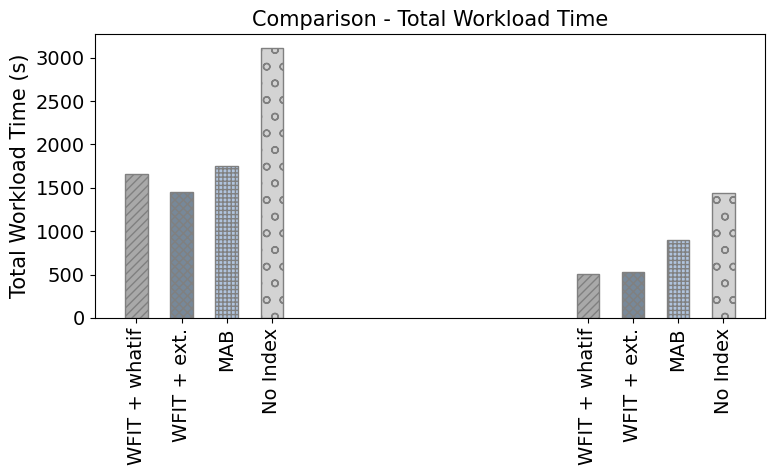

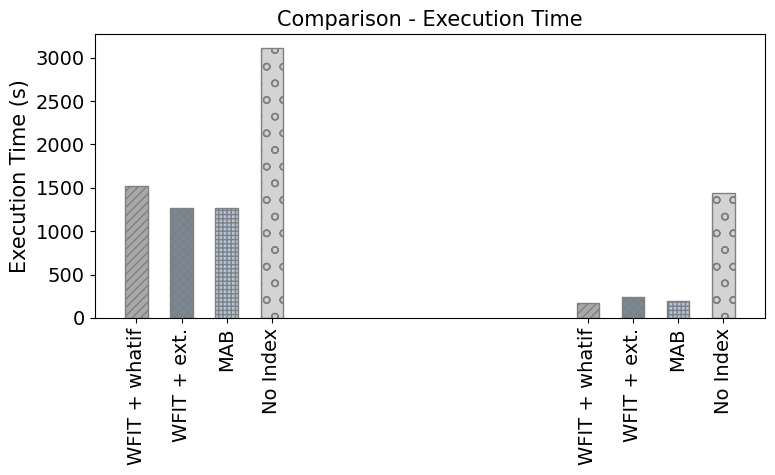

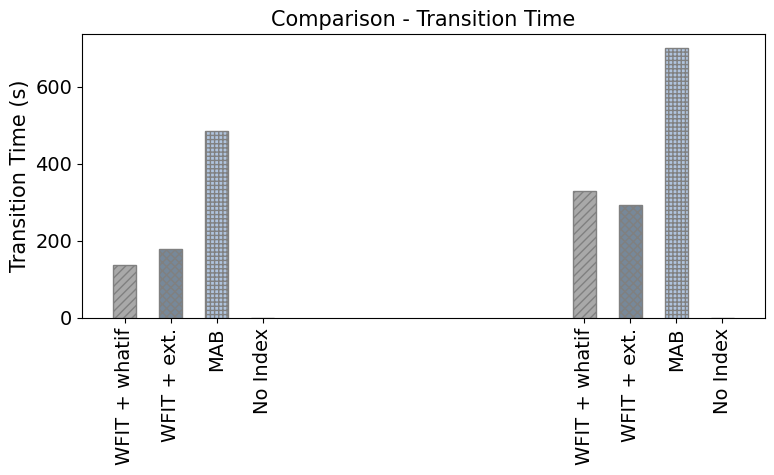

In [384]:
# Data
dataset1_times = [1654.39, 1448.81, 1749.49, 3113.60] # SSB static
dataset2_times = [503.86, 531.75, 898.12, 1438.93] # TPCH static
plot_bar_chart(dataset1_times, dataset2_times, 'Total Workload Time')

dataset1_times = [1518.24, 1269.26, 1264.75, 3113.60] # SSB static
dataset2_times = [174.12, 238.44, 197.28, 1438.93] # TPCH static
plot_bar_chart(dataset1_times, dataset2_times, 'Execution Time')

dataset1_times = [136.15, 179.56, 484.74, 0] # SSB static
dataset2_times = [329.74, 293.32, 700.84, 0] # TPCH static
plot_bar_chart(dataset1_times, dataset2_times, 'Transition Time')



#### Dynamic Workload

1. SSB

MAB --> total workload time: 3733.778475314008, total execution time: 2919.4957660000005, total transition time: 814.2827093140077, average recommendation time: 0.045916589299486076
WFIT --> total workload time: 1494.7356852400815, total execution time: 1312.9170040000001, total transition time: 181.8186812400818, average recommendation time: 14.025919085741043
WFIT --> total workload time (whatif): 1573.4474935598603, total execution time (whatif): 1431.598099, total transition time (whatif): 141.84939455986023, average recommendation time (whatif): 84.00335091948509
NOINDEX --> total workload time: 3109.1252300000006


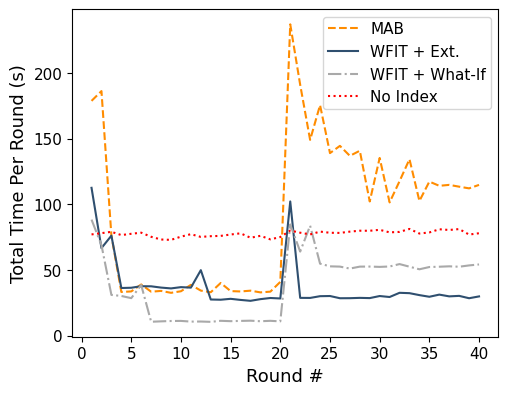

In [385]:
experiment = 'ssb_dynamic'

# read results from pickle file dictionary
with open(f'mab_results_{experiment}.pkl', 'rb') as f:
    mab_results = pickle.load(f)

mab_recommendation_time = mab_results['batch_recommmendation_time']
mab_materialization_time = mab_results['batch_materialization_time'] 
mab_execution_time = mab_results['batch_execution_time'] 
# convert to seconds
mab_recommendation_time = [time/1000 for time in mab_recommendation_time]
mab_materialization_time = [time/1000 for time in mab_materialization_time]
mab_execution_time = [time/1000 for time in mab_execution_time]
mab_total_time = [exec_time+mat_time for exec_time, mat_time in zip(mab_execution_time, mab_materialization_time)]

mab_total_execution_time = sum(mab_execution_time)
mab_total_transition_time = sum(mab_materialization_time)
mab_total_workload_time = sum(mab_total_time)
mab_total_recommendation_time = sum(mab_recommendation_time)
mab_average_recommendation_time = np.mean(mab_recommendation_time)

with open(f'wfit_results_{experiment}.pkl', 'rb') as f:
    wfit_results = pickle.load(f)

wfit_recommendation_time = wfit_results['batch_recommmendation_time']
wfit_materialization_time = wfit_results['batch_materialization_time']
wfit_execution_time = wfit_results['batch_execution_time']
wfit_total_time = [exec_time+mat_time for exec_time, mat_time in zip(wfit_execution_time, wfit_materialization_time)]
wfit_total_recommendation_time = sum(wfit_recommendation_time)

wfit_total_execution_time = sum(wfit_execution_time)    
wfit_total_transition_time = sum(wfit_materialization_time)
wfit_total_workload_time = sum(wfit_total_time)
wfit_average_recommendation_time = np.mean(wfit_recommendation_time)

with open(f'wfit_results_whatif_{experiment}.pkl', 'rb') as f:
    wfit_results_whatif = pickle.load(f)

wfit_recommendation_time_whatif = wfit_results_whatif['batch_recommmendation_time']
wfit_materialization_time_whatif = wfit_results_whatif['batch_materialization_time']
wfit_execution_time_whatif = wfit_results_whatif['batch_execution_time']
wfit_total_time_whatif = [exec_time+mat_time for exec_time, mat_time in zip(wfit_execution_time_whatif, wfit_materialization_time_whatif)]

wfit_execution_time_whatif = sum(wfit_execution_time_whatif)
wfit_materialization_time_whatif = sum(wfit_materialization_time_whatif)
wfit_total_workload_time_whatif = sum(wfit_total_time_whatif)
wfit_total_recommendation_time_whatif = sum(wfit_recommendation_time_whatif)
wfit_average_recommendation_time_whatif = np.mean(wfit_recommendation_time_whatif)

with open(f'noindex_results_{experiment}.pkl', 'rb') as f:
    workload = pickle.load(f)

noindex_execution_time = workload['batch_execution_time']
noindex_total_workload_time = sum(noindex_execution_time)


print(f'MAB --> total workload time: {mab_total_workload_time}, total execution time: {mab_total_execution_time}, total transition time: {mab_total_transition_time}, average recommendation time: {mab_average_recommendation_time}')
print(f'WFIT --> total workload time: {wfit_total_workload_time}, total execution time: {wfit_total_execution_time}, total transition time: {wfit_total_transition_time}, average recommendation time: {wfit_average_recommendation_time}')
print(f'WFIT --> total workload time (whatif): {wfit_total_workload_time_whatif}, total execution time (whatif): {wfit_execution_time_whatif}, total transition time (whatif): {wfit_materialization_time_whatif}, average recommendation time (whatif): {wfit_average_recommendation_time_whatif}')
print(f'NOINDEX --> total workload time: {noindex_total_workload_time}')

plot_total_workload_time(mab_total_time, wfit_total_time, wfit_total_time_whatif, noindex_execution_time, num_rounds=40)


MAB --> total workload time: 1465.7240268388973, total execution time: 535.703454, total transition time: 930.0205728388974, average recommendation time: 0.04604152089923445
WFIT --> total workload time: 610.5651865210876, total execution time: 348.137836, total transition time: 262.42735052108765, average recommendation time: 7.403931301832199
WFIT --> total workload time (whatif): 714.7890716503906, total execution time (whatif): 352.48325500000004, total transition time (whatif): 362.3058166503906, average recommendation time (whatif): 30.646066027879716
NOINDEX --> total workload time: 1462.409285


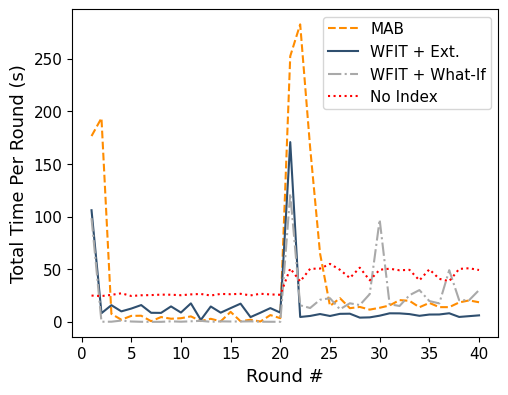

In [387]:
experiment = 'tpch_dynamic'

with open(f'wfit_results_{experiment}.pkl', 'rb') as f:
    wfit_results = pickle.load(f)

wfit_recommendation_time = wfit_results['batch_recommmendation_time']
wfit_materialization_time = wfit_results['batch_materialization_time']
wfit_execution_time = wfit_results['batch_execution_time']
wfit_total_time = [exec_time+mat_time for exec_time, mat_time in zip(wfit_execution_time, wfit_materialization_time)]
wfit_total_recommendation_time = sum(wfit_recommendation_time)

wfit_total_execution_time = sum(wfit_execution_time)    
wfit_total_transition_time = sum(wfit_materialization_time)
wfit_total_workload_time = sum(wfit_total_time)
wfit_average_recommendation_time = np.mean(wfit_recommendation_time)

with open(f'wfit_results_whatif_{experiment}.pkl', 'rb') as f:
    wfit_results_whatif = pickle.load(f)

wfit_recommendation_time_whatif = wfit_results_whatif['batch_recommmendation_time']
wfit_materialization_time_whatif = wfit_results_whatif['batch_materialization_time']
wfit_execution_time_whatif = wfit_results_whatif['batch_execution_time']
wfit_total_time_whatif = [exec_time+mat_time for exec_time, mat_time in zip(wfit_execution_time_whatif, wfit_materialization_time_whatif)]

wfit_execution_time_whatif = sum(wfit_execution_time_whatif)
wfit_materialization_time_whatif = sum(wfit_materialization_time_whatif)
wfit_total_workload_time_whatif = sum(wfit_total_time_whatif)
wfit_total_recommendation_time_whatif = sum(wfit_recommendation_time_whatif)
wfit_average_recommendation_time_whatif = np.mean(wfit_recommendation_time_whatif)

# read results from pickle file dictionary
with open(f'mab_results_{experiment}.pkl', 'rb') as f:
    mab_results = pickle.load(f)

mab_recommendation_time = mab_results['batch_recommmendation_time']
mab_materialization_time = mab_results['batch_materialization_time'] 
mab_execution_time = mab_results['batch_execution_time'] 
# convert to seconds
mab_recommendation_time = [time/1000 for time in mab_recommendation_time]
mab_materialization_time = [time/1000 for time in mab_materialization_time]
mab_execution_time = [time/1000 for time in mab_execution_time]
mab_total_time = [exec_time+mat_time for exec_time, mat_time in zip(mab_execution_time, mab_materialization_time)]

mab_total_execution_time = sum(mab_execution_time)
mab_total_transition_time = sum(mab_materialization_time)
mab_total_workload_time = sum(mab_total_time)
mab_total_recommendation_time = sum(mab_recommendation_time)
mab_average_recommendation_time = np.mean(mab_recommendation_time)

with open(f'noindex_results_{experiment}.pkl', 'rb') as f:
    workload = pickle.load(f)
noindex_execution_time = workload['batch_execution_time']
noindex_total_workload_time = sum(noindex_execution_time)


print(f'MAB --> total workload time: {mab_total_workload_time}, total execution time: {mab_total_execution_time}, total transition time: {mab_total_transition_time}, average recommendation time: {mab_average_recommendation_time}')
print(f'WFIT --> total workload time: {wfit_total_workload_time}, total execution time: {wfit_total_execution_time}, total transition time: {wfit_total_transition_time}, average recommendation time: {wfit_average_recommendation_time}')
print(f'WFIT --> total workload time (whatif): {wfit_total_workload_time_whatif}, total execution time (whatif): {wfit_execution_time_whatif}, total transition time (whatif): {wfit_materialization_time_whatif}, average recommendation time (whatif): {wfit_average_recommendation_time_whatif}')
print(f'NOINDEX --> total workload time: {noindex_total_workload_time}')

plot_total_workload_time(mab_total_time, wfit_total_time, wfit_total_time_whatif, noindex_execution_time, num_rounds=40, set_ylim=False)


SSB Dynamic:

MAB --> total workload time: 3733.778475314008, total execution time: 2919.4957660000005, total transition time: 814.2827093140077, average recommendation time: 0.045916589299486076
WFIT --> total workload time: 1494.7356852400815, total execution time: 1312.9170040000001, total transition time: 181.8186812400818, average recommendation time: 14.025919085741043
WFIT --> total workload time (whatif): 1573.4474935598603, total execution time (whatif): 1431.598099, total transition time (whatif): 141.84939455986023, average recommendation time (whatif): 84.00335091948509
NOINDEX --> total workload time: 3109.1252300000006


TPCH Dynamic:

MAB --> total workload time: 1465.7240268388973, total execution time: 535.703454, total transition time: 930.0205728388974, average recommendation time: 0.04604152089923445
WFIT --> total workload time: 610.5651865210876, total execution time: 348.137836, total transition time: 262.42735052108765, average recommendation time: 7.403931301832199
WFIT --> total workload time (whatif): 714.7890716503906, total execution time (whatif): 352.48325500000004, total transition time (whatif): 362.3058166503906, average recommendation time (whatif): 30.646066027879716
NOINDEX --> total workload time: 1462.409285

algorithms = ['WFIT + whatif', 'WFIT + ext.', 'MAB', 'No Index']

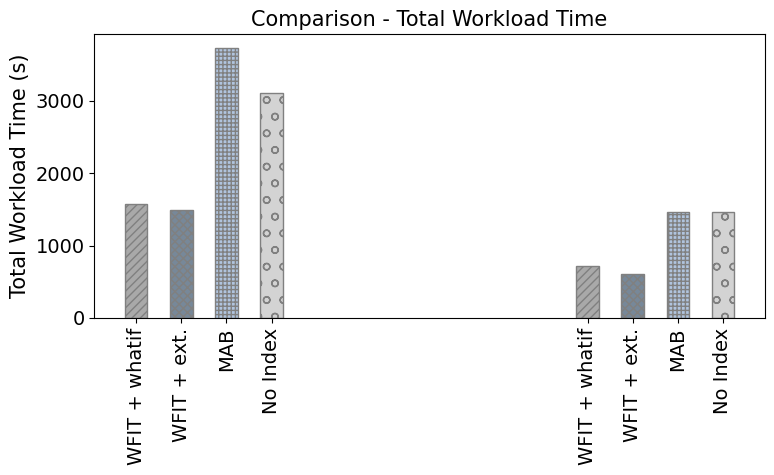

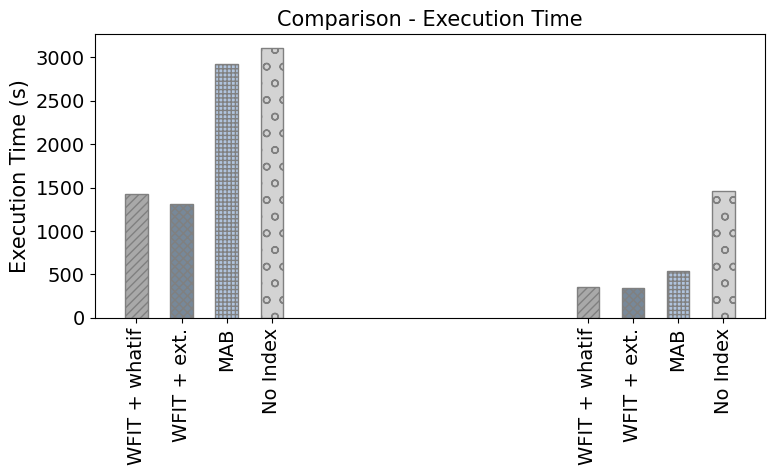

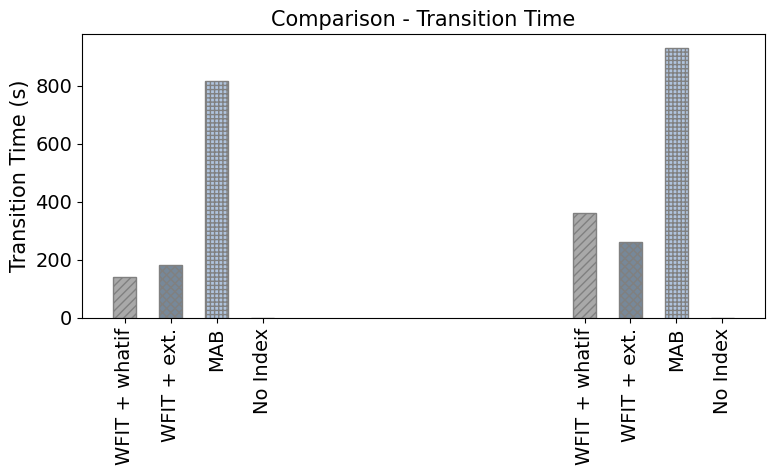

In [389]:
# Data
dataset1_times = [1573.45, 1494.74, 3733.78, 3109.13] # SSB 
dataset2_times = [714.78, 610.57, 1465.72, 1462.40] # TPCH 
plot_bar_chart(dataset1_times, dataset2_times, 'Total Workload Time')

dataset1_times = [1431.59, 1312.92, 2919.49, 3109.13] # SSB 
dataset2_times = [352.48, 348.14, 535.70, 1462.40] # TPCH 
plot_bar_chart(dataset1_times, dataset2_times, 'Execution Time')

dataset1_times = [141.85, 181.82, 814.28, 0] # SSB 
dataset2_times = [362.31, 262.43, 930.02, 0] # TPCH 
plot_bar_chart(dataset1_times, dataset2_times, 'Transition Time')
